# Notebook Setup

In [ ]:
!!pip install ipympl

['Requirement already satisfied: ipympl in /usr/local/lib/python3.10/dist-packages (0.9.4)',
 'Requirement already satisfied: ipython-genutils in /usr/local/lib/python3.10/dist-packages (from ipympl) (0.2.0)',
 'Requirement already satisfied: ipython<9 in /usr/local/lib/python3.10/dist-packages (from ipympl) (7.34.0)',
 'Requirement already satisfied: ipywidgets<9,>=7.6.0 in /usr/local/lib/python3.10/dist-packages (from ipympl) (7.7.1)',
 'Requirement already satisfied: matplotlib<4,>=3.4.0 in /usr/local/lib/python3.10/dist-packages (from ipympl) (3.7.1)',
 'Requirement already satisfied: numpy in /usr/local/lib/python3.10/dist-packages (from ipympl) (1.25.2)',
 'Requirement already satisfied: pillow in /usr/local/lib/python3.10/dist-packages (from ipympl) (9.4.0)',
 'Requirement already satisfied: traitlets<6 in /usr/local/lib/python3.10/dist-packages (from ipympl) (5.7.1)',
 'Requirement already satisfied: setuptools>=18.5 in /usr/local/lib/python3.10/dist-packages (from ipython<9->i

In [ ]:
from scipy.integrate import solve_ivp
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp


In [ ]:
# TO SHOW INTERACTIVE PLOT
%matplotlib widget
from google.colab import output
output.enable_custom_widget_manager()

# Tutorial


[Watch this](https://www.youtube.com/watch?v=GBBXZXmb8UE)

## Example 9.3 (Lavretsky) -- Delta Wing Control

A delta wing aircraft flying at a high angle of attach is open-loop unstable in roll. This is called "wing rock" and is induced by unsteady aerodynamic effects acting on the delta wing asymmetrically. Here's a video of this in [simulation](https://www.youtube.com/watch?v=a_5z_Z80D6E).

Here we consider a delta wing whose roll dynamics can be controlled with the ailerons. We will use the differential aileron as the input signal.

The generic roll dynamics are of the form:

$$
\begin{align}
\dot{\varphi} &= p\\
\dot{p} &= \theta_1 \varphi + \theta_2 p + (\theta_3 |\varphi| + \theta_4 |p|)p + \theta_5 \varphi^3 + \theta_6 \delta_a
\end{align}
$$

where $\varphi$ (rad) is the roll angle, $p$ is the roll rate (rad/s) and $\delta_a$ is the aileron differential (rad). The unknown constant parameters of this model are:

$$
\begin{align}
\theta_1 &= -0.018\\
\theta_2 &= 0.015\\
\theta_3 &= -0.062\\
\theta_4 &= 0.009\\
\theta_5 &= 0.021\\
\theta_6 &= 0.75\\
\end{align}
$$

Putting everything into the proper form we get:

$$
\underbrace{\left(\begin{array}{l}
\dot{\varphi} \\
\dot{p}
\end{array}\right)}_{x}=\underbrace{\left(\begin{array}{cc}
0 & 1 \\
\theta_{1} & \theta_{2}
\end{array}\right)}_{A} \underbrace{\left(\begin{array}{c}
\varphi \\
p
\end{array}\right)}_{x}+\underbrace{\left(\begin{array}{c}
0 \\
1
\end{array}\right)}_{B} \underbrace{\theta_{6}}_{\Lambda}\bigg(\underbrace{\delta_{a}}_{u}+\underbrace{\frac{1}{\theta_{6}}\left(\left(\theta_{3}|\varphi|+\theta_{4} |p|\right) p-\theta_{5} \varphi^{3}\right)}_{f(x)=\Theta^{T} \Phi(x)}\bigg)
$$

where

$$
\begin{aligned}
f(x) &=\underbrace{\frac{1}{\theta_{6}}\left(\theta_{3} \quad \theta_{4} \quad \theta_{5}\right)}_{\Theta^{T}} \underbrace{\left(|\varphi| p \quad |p| p \quad \varphi^{3}\right)^{T}}_{\Phi(x)} \\
&=-0.0827|\varphi| p+0.012|p| p+0.028 \varphi^{3}.
\end{aligned}
$$


### Reference Model

The reference model can really be anything we want it to be, as long as it can be put into state space form and it is of the same order ($n$) as the plant we are trying to control.

The transfer function of a generic 2nd order system is

$$
\frac{\varphi_{ref}}{\varphi_{cmd}} = \frac{\omega_n^2}{s^2 + 2\zeta \omega_n^2 s + \omega_n^2}
$$

where $\varphi$ is the roll angle and we get to pick the desired natural frequency and damping ratio.

Converting the transfer function above results in the reference model in state space form (I should probably make sure I can actually do this by myself):

$$
\underbrace{\left(\begin{array}{l}
\dot{\varphi}_{\text {ref }} \\
\dot{p}_{\text {ref }}
\end{array}\right)}_{\dot{x}_{ref}}=\underbrace{\left(\begin{array}{cc}
0 & 1 \\
-\omega_{n}^{2} & -2 \xi \omega_{n}
\end{array}\right)}_{A_{ref}} \underbrace{\left(\begin{array}{c}
\varphi_{\text {ref }} \\
p_{\text {ref }}
\end{array}\right)}_{x_{\text {ref}}}+\underbrace{\left(\begin{array}{c}
0 \\
\omega_{n}^{2}
\end{array}\right)}_{B_{\text {ref}}} \underbrace{\varphi_{\text {cmd }}}_{r}
$$

By using the model matching conditions ($A+B \Lambda K_{x}^{T}=A_{ref}, \quad B \Lambda K_{r}^{T}=B_{ref}$) you can see that the ideal (note no hat) gains ($K_x^T$ and $K_r^T$) are:

$$K_x^T = -\frac{1}{\theta_6}(\omega_n^2 + \theta_1 \quad 2\zeta \omega_n + \theta_2), \quad K_r^T = \frac{\omega_n^2}{\theta_6}$$


so the ideal gains are $K_x =  (-1.3093 -1.8867)^T$ and $K_r = 1.3333$.

In other words, these are the gain values which will cause the roll dynamics to track the reference model. Since we are in simulation land and already know the 'unknown constant parameters' ($\theta_{1-6}$), we can calculate the actual numerical values for the ideal gains above for a given damping ratio and natural freqency.






### FILL IN CODE HERE

In [ ]:
def plant_dynamics(t, plant_state, u):
    #todo: implement plant dynamics here
    pass

def adaptation_dynamics(t, adaptation_state, u):
    #todo: implement adaptation dynamics here, kr, kx, theta
    pass

def reference_dynamics(t, reference_state, r):
    #todo: implement reference dynamics here
    pass


def calc_control_input(plant_state, adaptation_state, r):
    Kx_hat = adaptation_state[:2]
    Kr_hat = adaptation_state[2]
    Theta_hat = adaptation_state[3:]

    #todo: implement control input here
    pass

def calc_Phi(state):
    varphi = state[0]
    p = state[1]


    #todo: implement Phi here
    pass

    return Phi

### Simulation Code

You shouldn't need to modify this part

In [ ]:
def calculate_r(t):
    # several step commands for 5 seconds each
    if t < 10:
        return np.radians(10)
    elif t < 20:
        return np.radians(20)
    elif t < 30:
        return np.radians(-5)
    elif t < 40:
        return np.radians(-10)
    elif t < 50:
        return np.radians(10)
    elif t < 60:
        return np.radians(0)
    elif t < 70:
        return np.radians(10)
    elif t < 80:
        return np.radians(20)
    elif t < 90:
        return np.radians(-5)
    elif t < 100:
        return np.radians(-10)
    else:
        return 0.0

def all_dynamics(t, y):
    plant_state = y[:2] #2 states
    reference_state = y[2:4] #2 states
    adaptation_state = y[4:] #6 states: [Kx[0], Kx[1], Kr, theta[0], theta[1], theta[2]]

    # get desired trajectory
    r = calculate_r(t)

    #calculate control input
    u = calc_control_input(plant_state, adaptation_state, r)

    e = plant_state - reference_state

    #calculate all of the dynamics
    plant_dot = plant_dynamics(t, plant_state, u)
    reference_dot = reference_dynamics(t, reference_state, r)
    adaptation_dot = adaptation_dynamics(t, adaptation_state, [e, plant_state, r])

    #return all of the dynamics
    return np.hstack([plant_dot, reference_dot, adaptation_dot])

In [ ]:
#tuning parameters from book
Gamma_x = np.diag([100,100]) #learning rate for Kx_hat
Gamma_r = 100 #learning rate for Kr_hat
Gamma_th = np.diag([100,100,100]) #learning rate for Theta_hat
Q = np.diag([1,10]) # Vdot = -e.T @ Q @ e for lyapunov stability on tracking.

wn = 1
zeta = .7

# real parameters of the system
theta1 = -.018
theta2 = .015
theta3 = -.062
theta4 = .009
theta5 = .021
theta6 = .75

#ideal gains for testing
Kx_ideal = np.array([-1.3093, -1.8867])
Kr_ideal = 1.3333
Theta_ideal = np.array([theta3, theta4, theta5]) * 1/theta6

#state space formulation
A = np.array([[0,1],[theta1, theta2]])
B = np.array([0,1])

# state space reference system
A_ref = np.array([[0,1],[-wn**2, -2*zeta*wn]])
B_ref = np.array([0, wn**2])

# solution to algebraic lyapunov equation, but pass in A.T and -Q to fit scipy docs
P = sp.linalg.solve_continuous_lyapunov(A_ref.T, -Q)

In [ ]:
tspan = np.linspace(0, 100, 1000)
sol = solve_ivp(all_dynamics,  (tspan[0], tspan[-1]),  t_eval=tspan,  y0=np.zeros(10),  max_step=.01 )

time = sol.t
varphi_hist = sol.y[0,:]
p_hist = sol.y[1,:]
varphiref_hist = sol.y[2,:]
p_ref_hist = sol.y[3,:]
Kx_hat_hist = sol.y[4:6,:]
Kr_hat_hist = sol.y[6,:]
Theta_hat_hist = sol.y[7:,:]

r_hist = []
for t in time:
    r_hist.append(calculate_r(t))

r_hist = np.array(r_hist)

#### Visualize

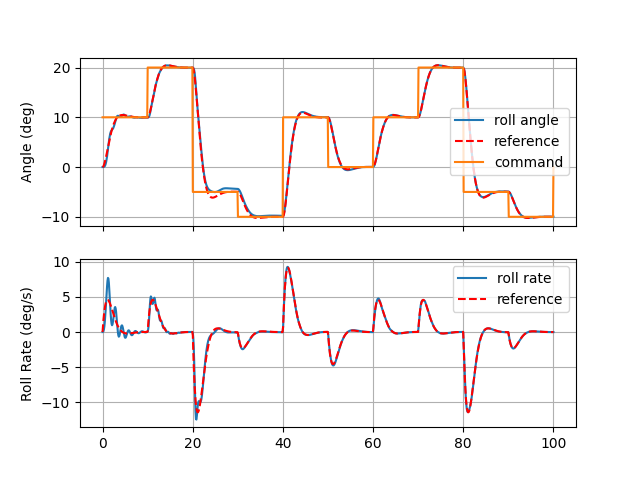

In [ ]:
#plot r, the reference system response, and the plant response together on one plot
fig,axs = plt.subplots(2,1, sharex=True)

axs[0].plot(time, np.degrees(varphi_hist))
axs[0].plot(time, np.degrees(varphiref_hist), '--r')
axs[0].plot(time, np.degrees(r_hist))
axs[0].grid(True)
axs[0].legend(['roll angle', 'reference', 'command'])
axs[0].set_ylabel('Angle (deg)')

axs[1].plot(time, np.degrees(p_hist))
axs[1].plot(time, np.degrees(p_ref_hist), '--r')
axs[1].grid(True)
axs[1].set_ylabel('Roll Rate (deg/s)')
axs[1].legend(['roll rate', 'reference', 'command'])

Text(0, 0.5, 'Roll Rate Error (deg/s)')

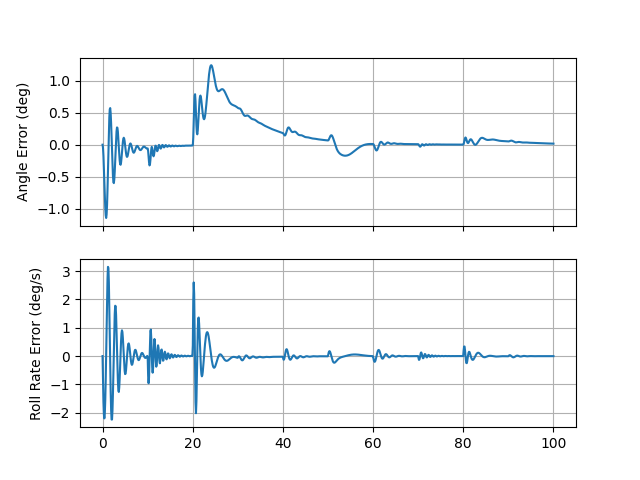

In [ ]:
#visualize tracking error over time between state and reference state
fig, axs = plt.subplots(2,1, sharex=True)

axs[0].plot(time, np.degrees(varphi_hist - varphiref_hist))
axs[0].grid(True)
axs[0].set_ylabel('Angle Error (deg)')

axs[1].plot(time, np.degrees(p_hist - p_ref_hist))
axs[1].grid(True)
axs[1].set_ylabel('Roll Rate Error (deg/s)')


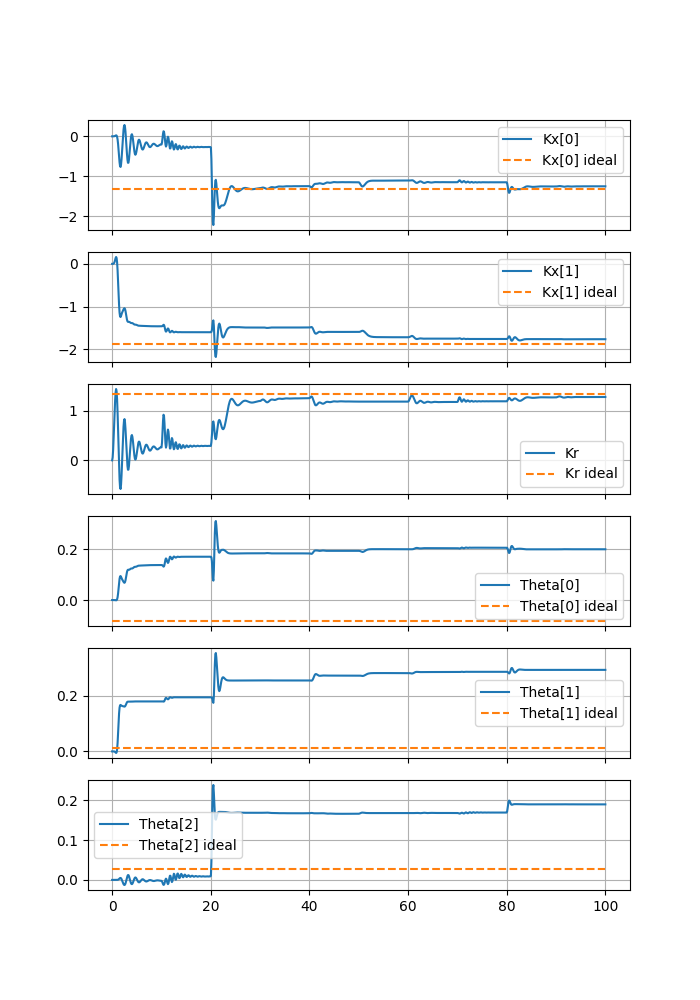

In [ ]:
#plot the adaptation weights over time and compare them to the real values
fig, axs = plt.subplots(6,1,sharex=True, figsize=(7,10))

axs[0].plot(time, Kx_hat_hist[0,:], label='Kx[0]')
axs[0].plot(time, [Kx_ideal[0]]*len(time), '--', label='Kx[0] ideal')
axs[0].grid(True)
axs[0].legend()

axs[1].plot(time, Kx_hat_hist[1,:], label='Kx[1]')
axs[1].plot(time, [Kx_ideal[1]]*len(time), '--', label='Kx[1] ideal')
axs[1].grid(True)
axs[1].legend()

axs[2].plot(time, Kr_hat_hist, label='Kr')
axs[2].plot(time, [Kr_ideal]*len(time), '--', label='Kr ideal')
axs[2].grid(True)
axs[2].legend()

axs[3].plot(time, Theta_hat_hist[0,:], label='Theta[0]')
axs[3].plot(time, [Theta_ideal[0]]*len(time), '--', label='Theta[0] ideal')
axs[3].grid(True)
axs[3].legend()

axs[4].plot(time, Theta_hat_hist[1,:], label='Theta[1]')
axs[4].plot(time, [Theta_ideal[1]]*len(time), '--', label='Theta[1] ideal')
axs[4].grid(True)
axs[4].legend()

axs[5].plot(time, Theta_hat_hist[2,:], label='Theta[2]')
axs[5].plot(time, [Theta_ideal[2]]*len(time), '--', label='Theta[2] ideal')
axs[5].grid(True)
axs[5].legend()


### SOLUTION

Run this cell instead of the one above to use the solution. Then run the simulation code.

In [ ]:
def plant_dynamics(t, plant_state, u):
    varphi = plant_state[0]
    p = plant_state[1]
    xdot = A @ plant_state + B * theta6 * (u + (theta3/theta6)*np.abs(varphi)*p + (theta4/theta6)*np.abs(p)*p + (theta5/theta6)*varphi**3)

    return xdot


def adaptation_dynamics(t, adaptation_state, adapt_input):
    #6 states: [Kx[0], Kx[1], Kr, theta[0], theta[1], theta[2]]
    #input; [error, x, r]
    e = adapt_input[0]
    x = adapt_input[1]
    r = adapt_input[2]

    K_x_hat_dot = -Gamma_x @ np.outer(x,e) @ P @ B # 2x2 (2x1 1x2) 2x2 2x1 = 2x1
    K_r_hat_dot = -Gamma_r * r * e.T @ P @ B # 1x1 1x1 1x2 2x2 2x1 = scalar
    Theta_hat_dot = Gamma_th @ np.outer(calc_Phi(x), e) @ P @ B # 3x3 3x1 1x2 2x2 2x1 = 3x1


    return np.hstack([K_x_hat_dot, K_r_hat_dot, Theta_hat_dot])

def reference_dynamics(t, reference_state, r):
    ref_dot = A_ref @ reference_state + B_ref * r

    return ref_dot


def calc_control_input(plant_state, adaptation_state, r):
    Kx_hat = adaptation_state[:2]
    Kr_hat = adaptation_state[2]
    Theta_hat = adaptation_state[3:]

    # 1x2 2x1 + 1x1 1x1 - 1x3 3x1 = 1x1
    u = np.inner(Kx_hat, plant_state) + Kr_hat * r - np.inner(Theta_hat, calc_Phi(plant_state))

    return u


def calc_Phi(state):
    varphi = state[0]
    p = state[1]

    Phi = np.array([np.abs(varphi)*p, np.abs(p)*p, varphi**3])

    return Phi

## Now using an approximation method- NOT DONE YET

Remember that we don't actually know the form of what need to go in $\Phi(x)$. So we need to approximate it with something. A common choice is to use radial basis functions.

This requires a few code changes, namely to the calc_Phi().

In [ ]:
N = 50
centers = np.random.uniform(-10, 10, (N, 2)) #9 2D centers
dMax = np.linalg.norm(centers[1, :] - centers[0, :])
width = N / dMax**2

Gamma_th = np.diag([50]*(N+1)) #learning rate for Theta_hat

def calc_Phi(state):
    norms = np.linalg.norm(state - centers, axis=1)
    Phi = np.exp(-width * norms**2)

    return np.append(Phi, 1.0)

In [ ]:
tspan = np.linspace(0, 100, 1000)
sol = solve_ivp(all_dynamics,  (tspan[0], tspan[-1]),  t_eval=tspan,  y0=np.zeros(10),  max_step=.01 )

time = sol.t
varphi_hist = sol.y[0,:]
p_hist = sol.y[1,:]
varphiref_hist = sol.y[2,:]
p_ref_hist = sol.y[3,:]
Kx_hat_hist = sol.y[4:6,:]
Kr_hat_hist = sol.y[6,:]
Theta_hat_hist = sol.y[7:,:]

r_hist = []
for t in time:
    r_hist.append(calculate_r(t))

r_hist = np.array(r_hist)

ValueError: shapes (3,) and (51,) not aligned: 3 (dim 0) != 51 (dim 0)